Imports

In [8]:
# BASE
import pandas as pd
import numpy as np
import sklearn
from sklearn import set_config

#VISUALIZATION
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree


#??????????????????????? WHAT ARE YOU????????????????????????
from scipy.stats import mode                                                        #?????????????????????????????????
from sklearn.datasets import load_digits                                            #?????????????????????????????
from sklearn.decomposition import PCA                                               #??????????????????????????
from sklearn.manifold import TSNE                                                   #????????????????????????????
from sklearn.datasets import make_classification                                    #??????????????????????????
from scipy.special import expit                                                     #???????????????????????????


#VOTING
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier


#CLASIFIERS
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                # search of the best params for random_forrest
from sklearn.linear_model import SGDClassifier                                      #????????????????????????
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      #????????????????????????
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                         #???????????
from sklearn.ensemble import AdaBoostClassifier                                     #?????????????




#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





#CLASTERING
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch                                               #????????????????????????????




# SCALERS and TRANSFORMATION
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline                                               # pipeline function for transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer




# metrics and processing 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score                                 #??????????????????????????



# EDA data treatment
import missingno


# other (mainly system libs)
import warnings
import sys
from io import StringIO
import time
import os
import shutil
from dotenv import load_dotenv
from sqlalchemy import create_engine
import itertools
from collections import Counter
import urllib.request as req
import zipfile

Constants:

In [9]:
SEED = 50
URL = 'https://www.kaggle.com/api/v1/datasets/download/ulrikthygepedersen/kickstarter-projects'


Downloading the data form https://www.kaggle.com/api/v1/datasets/download/ulrikthygepedersen/kickstarter-projects and unzipping it.

In [10]:
req.urlretrieve(URL, '/data/data.zip')
zipfile.ZipFile('/data/data.zip', 'a').extractall(path='./data/')

Some EDA...

                ID                                               Name   
0       1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
1        709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2       1703704063                                drawing for dollars   
3           727286                       Offline Wikipedia iPhone app   
4       1622952265                                         Pantshirts   
...            ...                                                ...   
374848  1486845240                  Americas Got Talent - Serious MAK   
374849   974738310  EVO Planner: The World's First Personalized Fl...   
374850  2106246194    Help save La Gattara, Arizona's first Cat Cafe!   
374851  1830173355                                Digital Dagger Coin   
374852  1339173863                              Spirits of the Forest   

            Category     Subcategory        Country             Launched   
0            Fashion         Fashion  United St

ValueError: could not convert string to float: 'Grace Jones Does Not Give A F$#% T-Shirt (limited Edition) '

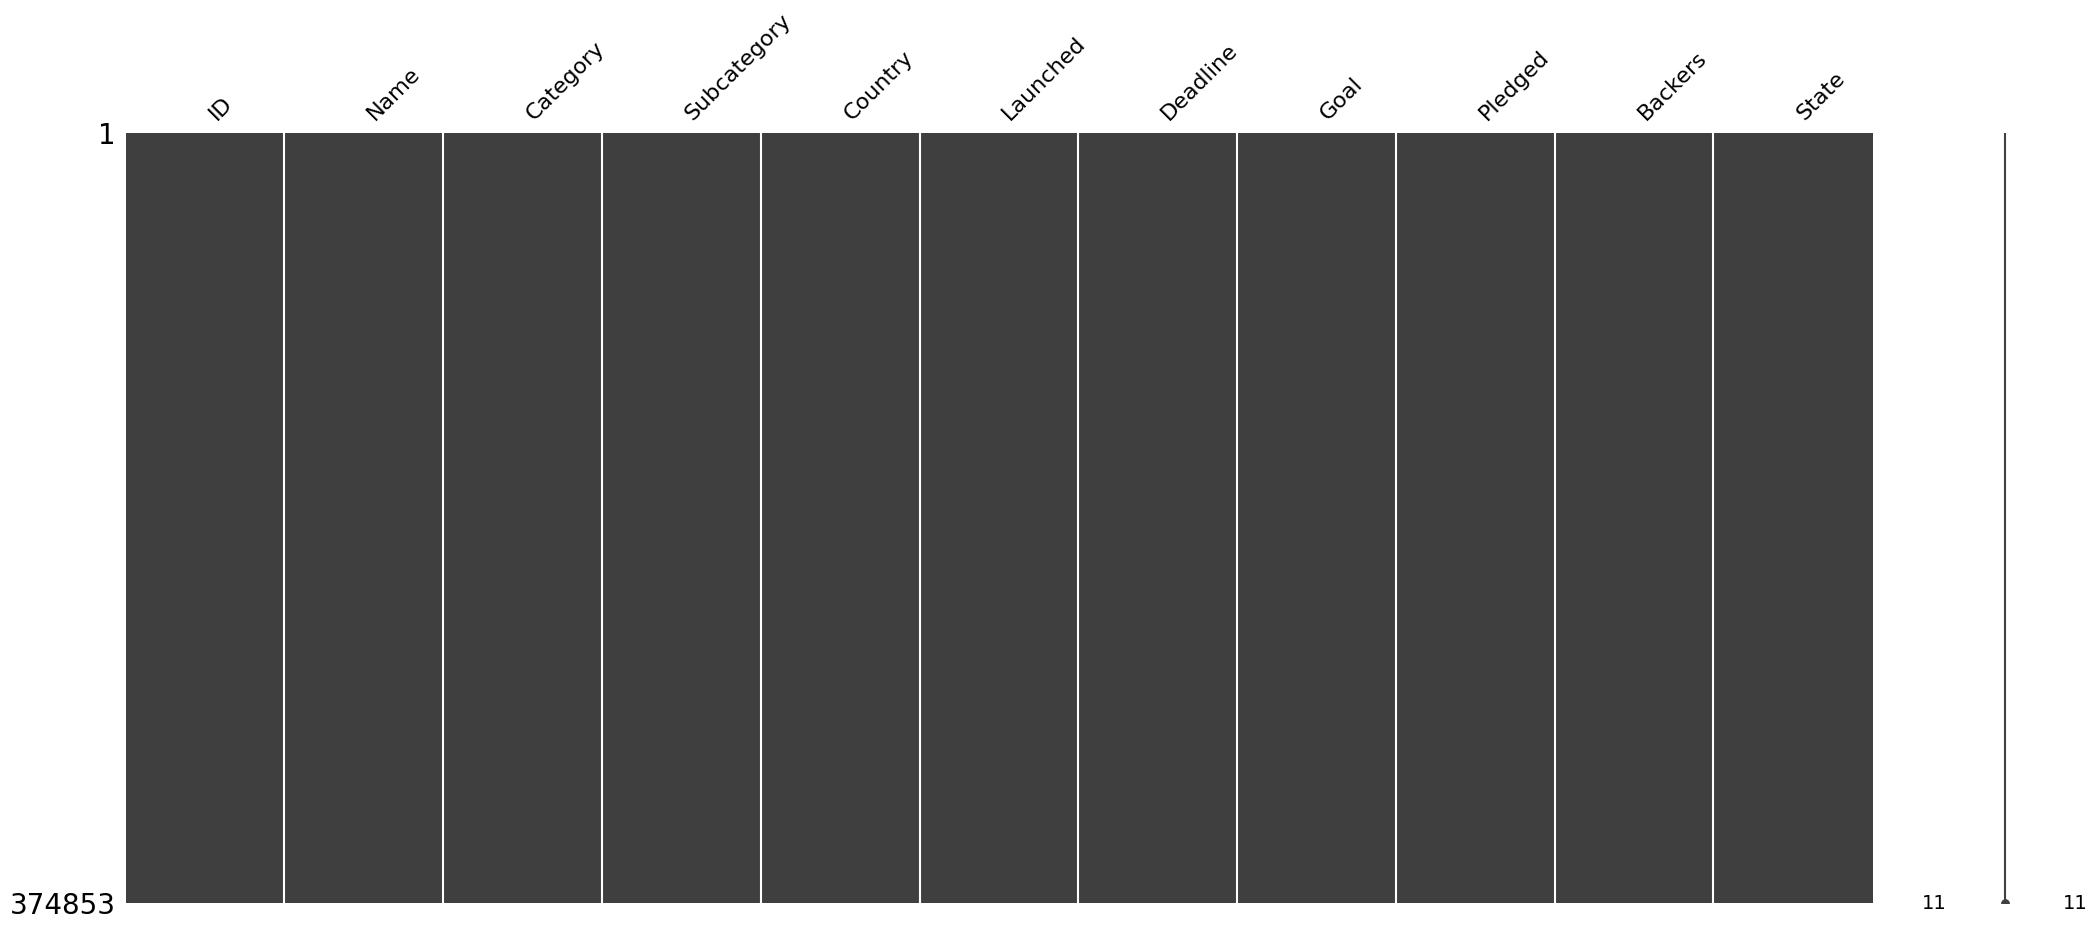

In [ ]:
df = pd.read_csv('./data/kickstarter_projects.csv')
missingno.matrix(df)
print(df)
print(df.info())
print(df.describe())

In [12]:
df.columns = [val.strip().replace(' ','_').lower() for val in df.columns.tolist()]
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')

In [13]:
cat_cols = [val for val in df.columns.tolist() if df[val].nunique() < 50]
df['duration_days'] = df.deadline - df.launched
df['duration_days'] = df['duration_days'].dt.days

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df.state, train_size=0.7, stratify=df.state, random_state=SEED)
X_train.to_csv('./data/X_train.csv',index=False)
X_test.to_csv('./data/X_test.csv',index=False)
y_train.to_csv('./data/y_train.csv',index=False)
y_test.to_csv('./data/y_test.csv',index=False)